## Imports

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy as sp
import scipy.stats as stats
from scipy.stats import t

## Introduction

The goal of this project is for you to practice statistical analysis using the iterative data analysis process. I have chosen two datasets based on trading assets. We are going to prove if there is a correlation in terms of parallel increase or decrease between crypto and standard stock. To do it we selected Bitcoin on the side of crypto and Dow Jones. 

**Bitcoin** - A decentralized digital currency without a central bank or single administrator.

**Dow Jones** - Measures the stock performance of 30 large companies listed on stock exchanges in the United States.

We thing both are good to measure to simplify what we want to archieve. 

----

**[Spoiler]** I finally decided to do not use Dow Jones dataset and focus only on Bitcoin one.

## Data Exploration

### Crypto

In [208]:
crypto_path = "data/bitcoin_prices.csv"
crypto = pd.read_csv(crypto_path, sep=";")

Let's take a look into our imported dataset.

In [211]:
crypto.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2020-03-25,BTCUSD,6769.0,6769.0,6533.0,6721.5,2070.93,1.376608e+07
1,2020-03-24,BTCUSD,6505.1,6875.0,6404.0,6769.0,15188.15,1.009810e+08
2,2020-03-23,BTCUSD,5825.5,6615.0,5688.1,6505.1,16492.58,1.023196e+08
3,2020-03-22,BTCUSD,6196.3,6419.9,5748.7,5825.5,11834.26,7.158168e+07
4,2020-03-21,BTCUSD,6206.8,6469.9,5850.0,6196.3,11088.62,6.856397e+07


In [212]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
Date          2351 non-null object
Symbol        2351 non-null object
Open          2351 non-null float64
High          2351 non-null float64
Low           2351 non-null float64
Close         2351 non-null float64
Volume BTC    2351 non-null float64
Volume USD    2351 non-null float64
dtypes: float64(6), object(2)
memory usage: 147.1+ KB


In [213]:
crypto.dtypes

Date           object
Symbol         object
Open          float64
High          float64
Low           float64
Close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

Pretty good dataset! We do have all we need related to Bitcoin trade info. Date, volume, and deep information about price (High, Low, Open, Close) from each day.

Let's go deeper. Do we have any null value in our entire dataset? Very important information as we should have all data, if not, we should remove the row, as we can not have partial information here.

In [214]:
crypto.isnull().any()

Date          False
Symbol        False
Open          False
High          False
Low           False
Close         False
Volume BTC    False
Volume USD    False
dtype: bool

Good! No nulls. Our dataset is sorted, what is the first date from we do have info? On other words, when bitcoin start trading.

In [215]:
crypto["Date"].min()

'2013-10-06'

So Bitcoin started trading on 2013. To handle better the visualization of the price, let's decouple into separate columns the year, month and day. 

In [216]:
crypto['year'] = pd.DatetimeIndex(crypto['Date']).year
crypto['month'] = pd.DatetimeIndex(crypto['Date']).month
crypto['day'] = pd.DatetimeIndex(crypto['Date']).day

We also should create a new column to homogenize our price. We are going to calculate the mean from the highest and lowest price for each day.

In [217]:
def calculate_mean(high_price, low_price):
    return (high_price + low_price) / 2

In [218]:
crypto["AveragePrice"] = crypto.apply(lambda x: calculate_mean(x.High, x.Low), axis=1)

Let's see what is the result of our changes!

In [219]:
crypto.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,year,month,day,AveragePrice
0,2020-03-25,BTCUSD,6769.0,6769.0,6533.0,6721.5,2070.93,1.376608e+07,2020,3,25,6651.00
1,2020-03-24,BTCUSD,6505.1,6875.0,6404.0,6769.0,15188.15,1.009810e+08,2020,3,24,6639.50
2,2020-03-23,BTCUSD,5825.5,6615.0,5688.1,6505.1,16492.58,1.023196e+08,2020,3,23,6151.55
3,2020-03-22,BTCUSD,6196.3,6419.9,5748.7,5825.5,11834.26,7.158168e+07,2020,3,22,6084.30
4,2020-03-21,BTCUSD,6206.8,6469.9,5850.0,6196.3,11088.62,6.856397e+07,2020,3,21,6159.95


To finalize, we remove columns we are not going to use. 

In [220]:
crypto.drop('Symbol', axis=1, inplace=True)

### Stock 

Our stock dataset is based on Dow Jonex index.
[Update] We are not going to use this dataset, so our exploration here will be soft. 

In [229]:
stock_path = "data/dow_jones_indices.csv"
stock = pd.read_csv(stock_path, sep=";")

In [230]:
stock.head()

,Date,Dow Jones Industrial Average TR,Dow Jones Industrial Average NTR,Dow Jones Industrial Average
0,3/25/15,"35644,4","31833,34","17718,54"
1,3/26/15,"35563,32","31760,93","17678,23"
2,3/27/15,"35632,59","31822,79","17712,66"
3,3/30/15,"36162,97","32296,47","17976,31"
4,3/31/15,"35766,56","31940,75","17776,12"


- Dow Jones Industrial Average: Average price. 
- Dow Jones Industrial Average TR: Total Return. Average + Capital Gains + Dividends reinvested.
- Dow Jones Industrial Average NTR: Net Total Return. Average + Capitsl Gaines + Minimum net dividens reinvested.

In [231]:
stock.columns = ['date', 'tr_price_average', 'ntr_price_average', 'price_average']

In [232]:
stock.head()

,date,tr_price_average,ntr_price_average,price_average
0,3/25/15,"35644,4","31833,34","17718,54"
1,3/26/15,"35563,32","31760,93","17678,23"
2,3/27/15,"35632,59","31822,79","17712,66"
3,3/30/15,"36162,97","32296,47","17976,31"
4,3/31/15,"35766,56","31940,75","17776,12"


We create a new column with the year the current date has.

In [236]:
stock['year'] = pd.DatetimeIndex(stock['date']).year

From when we do have data? 

In [237]:
stock["year"].min()

2015

To visualize our data, we first convert the price to float.

In [239]:
stock['price_average'] = pd.to_numeric(stock['price_average'],errors='coerce')
stock['price_average'] = stock['price_average'].astype(float)

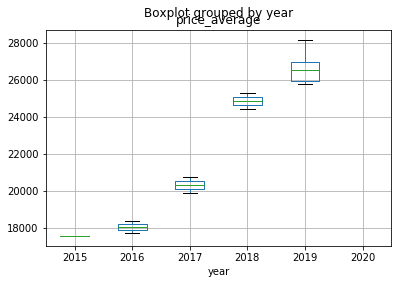

In [240]:
_= stock.boxplot(column='price_average', by='year')

Pretty good visualization. We can see the increase from each year with little outliers.

After visualizing the stock dataset, I decided to go and visualize and get correlations from only the crypto one. Here we only have the average price based on date. On crypto dataset, we do have more data for each day, and we can get correlations from Open and Close day, high and low, volume... More completed one. Also, in terms of hypothesis testing, I have in mind to correlate if the volume does have an impact on variation from Open to Close bid. 

## Statistical analysis

Here we are going to go way deeper to visualize crypto columns. Will be they good enough to be able to test our purpose? Let's take a look.

### How many days passed since minimum price value and maximum one?

In [241]:
max_price_date = crypto["AveragePrice"].max()
max_row = crypto[crypto["AveragePrice"] == max_price_date].head()

In [242]:
min_price_date = crypto["AveragePrice"].min()
min_row = crypto[crypto["AveragePrice"] == min_price_date].head()

In [246]:
d1_min = datetime.datetime(min_row.year,min_row.month,min_row.day)
d2_max = datetime.datetime(max_row.year,max_row.month,max_row.day)
days_passed = (d2_max-d1_min).days
print(f"Passed {days_passed} days since minimum price value to highest one.")

Passed 1532 days since minimum price value to highest one.


In [248]:
crypto[["Date", "AveragePrice"]].sort_values('AveragePrice', ascending=False).head(10)

,Date,AveragePrice
817,2017-12-17,19113.55
816,2017-12-18,18793.75
818,2017-12-16,18421.50
815,2017-12-19,17835.15
819,2017-12-15,17136.65
822,2017-12-12,16800.00
797,2018-01-06,16706.25
814,2017-12-20,16612.85
821,2017-12-13,16458.45
796,2018-01-07,16382.50


Most of highest prices are distributed from late-2017 and early-2018.

### Visualize distributions

You all know price of bitcoin is so volatile so we expect there won't be a normal distribution here.

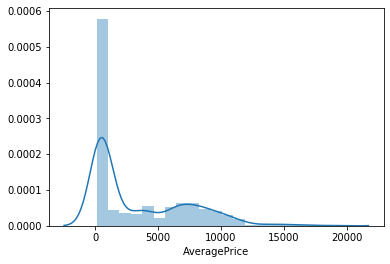

In [255]:
sns.distplot(crypto['AveragePrice'])
plt.show()

As expected, there is a huge amount of values distributed from 0 to 1000.

Now we are going to visualize a box plot based on the year.

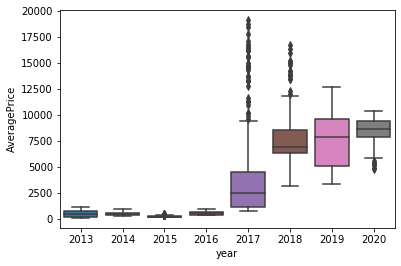

In [256]:
sns.boxplot(x='year', y ='AveragePrice', data=crypto)
plt.show()

🤯. 2017 was a crazy year with many outliers. We can see a way better distribution in 2019. Let's separate 2013-2016 to 2017 - 2010 distributions as we can not visualize it good enough here.

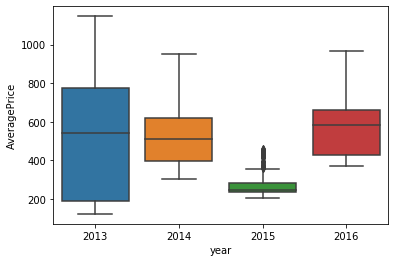

In [259]:
sns.boxplot(x='year', y ='AveragePrice', data=crypto[crypto["year"] < 2017])
plt.show()

Good! 2015 was a year with no volatilty but with many outliers. Let's see now only 2017-2020 distributions.

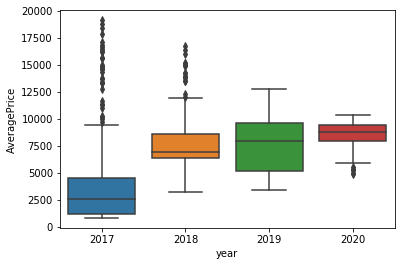

In [261]:
sns.boxplot(x='year', y ='AveragePrice', data=crypto[crypto["year"] >= 2017])
plt.show()

Still, 2017 and 2018 were years with many outliers and huge volatility. We are going to visualize now only volume.

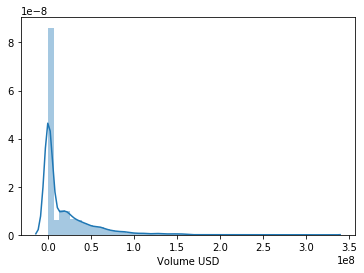

In [262]:
sns.distplot(crypto['Volume USD'])
plt.show()

Interesting.. we got two similar distributions. Fat-tailed ones.

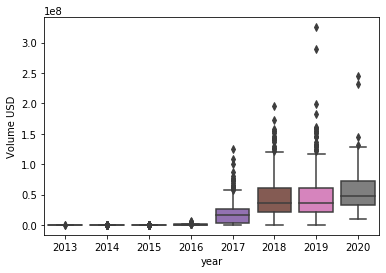

In [263]:
sns.boxplot(x='year', y ='Volume USD', data=crypto)
plt.show()

Same as before, but in terms of outliers, 2019 won the spot. We need to adjust first. We are going to visualize a distribution for 2019 and maximum $1.5B of volume.

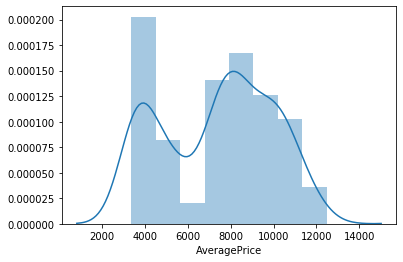

In [265]:
sns.distplot(crypto[(crypto["year"] == 2019) & (crypto["Volume USD"] < 150000000)]["AveragePrice"])

In [324]:
def percentile_value_price(group, percentile):
    return np.percentile(group["AveragePrice"], percentile)

def percentile_value_volume(group, percentile):
    return np.percentile(group["Volume USD"], percentile)

### Percentile: Price vs Year.

In [333]:
for year, group in crypto.groupby(['year']):
    print(f"Year {year} and quartile 25 = {percentile_value_price(group, 25)}")
    print(f"Year {year} and mean = {percentile_value_price(group, 50)}")
    print(f"Year {year} and quartile 75 = {percentile_value_price(group, 75)}")
    print(f"Year {year} and quartile 90 = {percentile_value_price(group, 90)}")
    print("-------")

Year 2013 and quartile 25 = 189.805
Year 2013 and mean = 541.0
Year 2013 and quartile 75 = 773.7574999999999
Year 2013 and quartile 90 = 954.7760000000001
-------
Year 2014 and quartile 25 = 397.0
Year 2014 and mean = 511.5
Year 2014 and quartile 75 = 621.965
Year 2014 and quartile 90 = 737.1900000000005
-------
Year 2015 and quartile 25 = 234.49
Year 2015 and mean = 248.32999999999998
Year 2015 and quartile 75 = 285.005
Year 2015 and quartile 90 = 363.28000000000003
-------
Year 2016 and quartile 25 = 429.70874999999995
Year 2016 and mean = 582.6775
Year 2016 and quartile 75 = 663.52125
Year 2016 and quartile 90 = 743.3625
-------
Year 2017 and quartile 25 = 1192.155
Year 2017 and mean = 2558.165
Year 2017 and quartile 75 = 4511.1
Year 2017 and quartile 90 = 8304.210000000005
-------
Year 2018 and quartile 25 = 6367.15
Year 2018 and mean = 6904.45
Year 2018 and quartile 75 = 8586.3
Year 2018 and quartile 90 = 10705.400000000001
-------
Year 2019 and quartile 25 = 5099.05
Year 2019 and

### Percentile: Volume vs Year.

In [334]:
for year, group in crypto.groupby(['year']):
    print(f"Year {year} and quartile 25 = {percentile_value_volume(group, 25)}")
    print(f"Year {year} and mean = {percentile_value_volume(group, 50)}")
    print(f"Year {year} and quartile 75 = {percentile_value_volume(group, 75)}")
    print(f"Year {year} and quartile 90 = {percentile_value_volume(group, 90)}")
    print("-------")

Year 2013 and quartile 25 = 2893.69
Year 2013 and mean = 10535.84
Year 2013 and quartile 75 = 32768.24
Year 2013 and quartile 90 = 47496.308000000005
-------
Year 2014 and quartile 25 = 1322.88
Year 2014 and mean = 3757.03
Year 2014 and quartile 75 = 9667.69
Year 2014 and quartile 90 = 19618.652000000002
-------
Year 2015 and quartile 25 = 3642.55
Year 2015 and mean = 10099.44
Year 2015 and quartile 75 = 26486.71
Year 2015 and quartile 90 = 61438.22400000002
-------
Year 2016 and quartile 25 = 314132.97750000004
Year 2016 and mean = 538370.085
Year 2016 and quartile 75 = 853569.7875
Year 2016 and quartile 90 = 1531952.785
-------
Year 2017 and quartile 25 = 3595097.32
Year 2017 and mean = 15844622.6
Year 2017 and quartile 75 = 25369950.38
Year 2017 and quartile 90 = 46201708.21200001
-------
Year 2018 and quartile 25 = 20822707.48
Year 2018 and mean = 35344075.9
Year 2018 and quartile 75 = 60523770.56
Year 2018 and quartile 90 = 91881661.36000001
-------
Year 2019 and quartile 25 = 207

We are going to finalize our visualization showing a distplot from averagePrices more than 1000 and less than 13000.

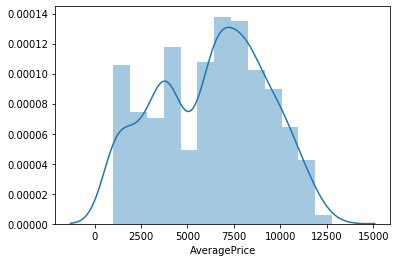

In [336]:
sns.distplot(crypto[(crypto['AveragePrice'] > 1000) & (crypto['AveragePrice'] < 13000)]["AveragePrice"])

It looks like a normal distribution now.

### Correlations

It's time now to see the correlations from each column. We can detect there will be many correlations as the price only variens in a timeframe of hours.

In [338]:
correlations = crypto.corr()
correlations.head()

,Open,High,Low,Close,Volume BTC,Volume USD,year,month,day,AveragePrice
Open,1.000000,0.998845,0.998037,0.997815,0.535917,0.737333,0.767229,0.019395,-0.005428,0.999089
High,0.998845,1.000000,0.997466,0.998952,0.546265,0.748373,0.762856,0.019811,-0.005044,0.999414
Low,0.998037,0.997466,1.000000,0.998768,0.520906,0.720819,0.773902,0.021529,-0.006970,0.999317
Close,0.997815,0.998952,0.998768,1.000000,0.533154,0.734400,0.767197,0.020884,-0.006767,0.999496
Volume BTC,0.535917,0.546265,0.520906,0.533154,1.000000,0.869827,0.634558,-0.075676,0.011623,0.534412


Nice! We can see way correlations here. Let's see some of them individually.

In [339]:
correlations["Low"]

Open            0.998037
High            0.997466
Low             1.000000
Close           0.998768
Volume BTC      0.520906
Volume USD      0.720819
year            0.773902
month           0.021529
day            -0.006970
AveragePrice    0.999317
Name: Low, dtype: float64

Makes sense, right? Low has a huge correlation with Open and High price value. Also in terms of USD Volume. Quite good the correlation the price value has against the year. Let's visualize them on a heatmap.

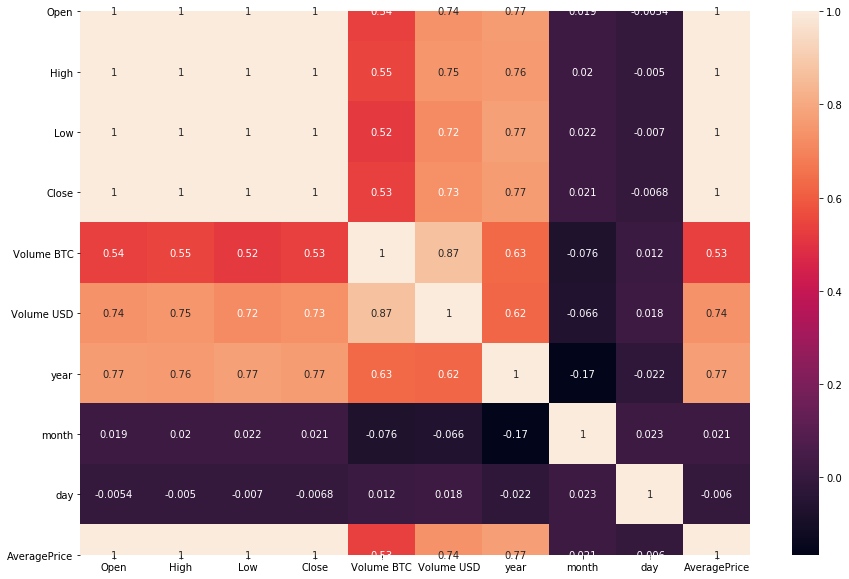

In [340]:
fig, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

🤩 Beautiful! Nice to see that light theme color on the heatmap, it means we do have quite correlations here.

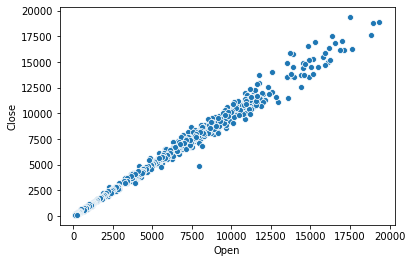

In [184]:
sns.scatterplot(crypto['Open'], crypto['Close'])

Almost linear! But as price increases, there is more variety between Open and Close price value.

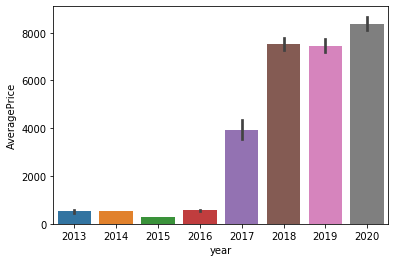

In [341]:
sns.barplot(x='year',y='AveragePrice', data=crypto)

As we visualized before, there is an inflexion point from 2017 to now.

Time to visualize together increment from High to Low. 

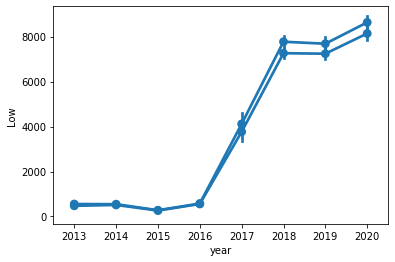

In [194]:
sns.pointplot(x="year", y="High", data=crypto)
sns.pointplot(x="year", y="Low", data=crypto)

As volatility skyrocket since 2017, also the difference between high price value against low one per day.

## Hypothesis testing

We got some insights from the crypto dataset.
- 2017 was a terrific year in terms of volatibility.
- In terms of volume, 2019 got some days which increased a lot (More than 3B where average is 1B).
- High and Low price per day is more volatile on last years. 

For this reason, we are going to test if Volume is important in terms of price variation.

In [345]:
ttest, pval = sp.stats.ttest_rel(crypto["Volume USD"], crypto["AveragePrice"])
ttest, pval

(29.63445653553548, 2.9827675511696148e-164)

In [346]:
# H0 - Volume does not have an impact on price.
# H1 - Volue does have an impact on price.

We reject our h0 as pvalue is less than our alpha 0.05.

## Bibliography

Source from where we got our data: 
- https://www.cryptodatadownload.com/data/kraken/
- https://us.spindices.com/indices/equity/dow-jones-industrial-average